In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import swifter
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
import graphviz
from sklearn import tree
from sklearn.svm import SVC

In [2]:
df = pd.read_pickle('./data_format1/df_train_good.pkl')
df.head()

,user_id,merchant_id,label,seller_item_count,brand_count,action_count_0,action_count_1,action_count_2,action_count_3,action_0,action_1,action_2,action_3,age_range,gender
0,34176,3906,0,308,2.0,410.0,0.0,34.0,7.0,36.0,0.0,1.0,2.0,6.0,0.0
1,34176,121,0,1179,2.0,410.0,0.0,34.0,7.0,13.0,0.0,1.0,0.0,6.0,0.0
2,34176,4356,1,67,2.0,410.0,0.0,34.0,7.0,12.0,0.0,6.0,0.0,6.0,0.0
3,34176,2217,0,377,2.0,410.0,0.0,34.0,7.0,1.0,0.0,1.0,0.0,6.0,0.0
4,81036,3906,0,308,2.0,129.0,0.0,25.0,21.0,5.0,0.0,1.0,1.0,0.0,0.0


In [3]:
df_test0 = df.loc[df.label==0].sample(n = 2000, replace = False) 
df_test1 = df.loc[df.label==1].sample(n = 2000, replace = False) 

In [4]:
df_test = pd.concat([df_test0,df_test1])

In [5]:
df_train = df.drop(index=df_test.index)
df_train.head()

,user_id,merchant_id,label,seller_item_count,brand_count,action_count_0,action_count_1,action_count_2,action_count_3,action_0,action_1,action_2,action_3,age_range,gender
0,34176,3906,0,308,2.0,410.0,0.0,34.0,7.0,36.0,0.0,1.0,2.0,6.0,0.0
1,34176,121,0,1179,2.0,410.0,0.0,34.0,7.0,13.0,0.0,1.0,0.0,6.0,0.0
2,34176,4356,1,67,2.0,410.0,0.0,34.0,7.0,12.0,0.0,6.0,0.0,6.0,0.0
3,34176,2217,0,377,2.0,410.0,0.0,34.0,7.0,1.0,0.0,1.0,0.0,6.0,0.0
4,81036,3906,0,308,2.0,129.0,0.0,25.0,21.0,5.0,0.0,1.0,1.0,0.0,0.0


In [6]:
target_test = df_test.label
attributes_test = df_test.drop(['merchant_id','user_id','label'],axis=1)
target_train = df_train.label
attributes_train = df_train.drop(['merchant_id','user_id','label'],axis=1)

In [7]:
attributes_train.head()

,seller_item_count,brand_count,action_count_0,action_count_1,action_count_2,action_count_3,action_0,action_1,action_2,action_3,age_range,gender
0,308,2.0,410.0,0.0,34.0,7.0,36.0,0.0,1.0,2.0,6.0,0.0
1,1179,2.0,410.0,0.0,34.0,7.0,13.0,0.0,1.0,0.0,6.0,0.0
2,67,2.0,410.0,0.0,34.0,7.0,12.0,0.0,6.0,0.0,6.0,0.0
3,377,2.0,410.0,0.0,34.0,7.0,1.0,0.0,1.0,0.0,6.0,0.0
4,308,2.0,129.0,0.0,25.0,21.0,5.0,0.0,1.0,1.0,0.0,0.0


In [8]:
1/(target_train.value_counts()/target_train.shape[0])

0     1.057436
1    18.410550
Name: label, dtype: float64

## Weighted Logistic Regression

In [27]:
hparam = {'C':[0.01,0.1,1,10,100]}
# define class weights
w = {0:1,1:18.4}
# define model
lgr2 = LogisticRegression(max_iter=1000, class_weight=w)
# fit it
lgr2CV = GridSearchCV(lgr2,param_grid=hparam,n_jobs=-1)
lgr2CV.fit(attributes_train,target_train)

GridSearchCV(estimator=LogisticRegression(class_weight={0: 1, 1: 18.4},
                                          max_iter=1000),
             n_jobs=-1, param_grid={'C': [0.01, 0.1, 1, 10, 100]})

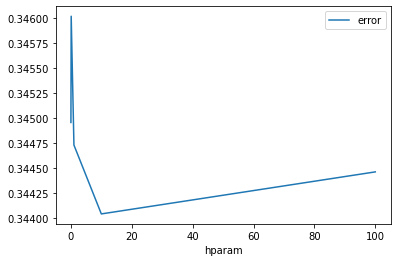

In [28]:
results = pd.DataFrame()
results['hparam'] = hparam['C']
results['error'] = 1 - lgr2CV.cv_results_['mean_test_score']
results.plot.line(x='hparam',y='error')

In [29]:
(lgr2CV.best_estimator_.predict(attributes_test) == target_test).mean()

0.593

## Decision Tree

In [30]:
hparam = {'max_depth':range(1,6)}

In [31]:
w = {0:1,1:18.4}
Tree = DecisionTreeClassifier(random_state=1,class_weight=w)
treeCV = GridSearchCV(Tree, param_grid=hparam, return_train_score=True)

In [32]:
treeCV.fit(attributes_train,target_train)
print('best param', treeCV.best_params_)
print("test errror rate", (1 - treeCV.best_score_).round(3))

best param {'max_depth': 1}
test errror rate 0.224


In [33]:
(treeCV.best_estimator_.predict(attributes_test) == target_test).mean()

0.577

<BarContainer object of 12 artists>

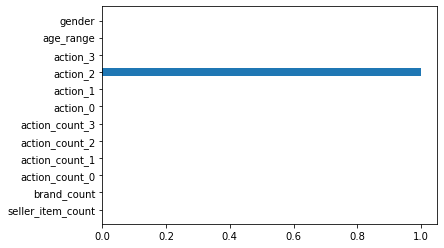

In [41]:
plt.barh(attributes_train.columns.tolist(),height=0.5,width=treeCV.best_estimator_.feature_importances_,align="center")

## Random Forest

In [35]:
w = {0:1,1:18.4}
hparam = {'n_estimators':range(5,21)}
forest = RandomForestClassifier(class_weight=w) 
forestCV = GridSearchCV(forest, param_grid=hparam, return_train_score=True)
forestCV.fit(attributes_train,target_train)

GridSearchCV(estimator=RandomForestClassifier(class_weight={0: 1, 1: 18.4}),
             param_grid={'n_estimators': range(5, 21)},
             return_train_score=True)

In [37]:
(forestCV.best_estimator_.predict(attributes_test) == target_test).mean()

0.49975

<BarContainer object of 12 artists>

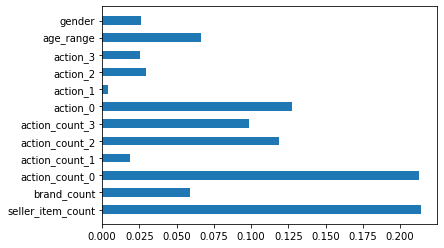

In [40]:
plt.barh(attributes_train.columns.tolist(),height=0.5,width=forestCV.best_estimator_.feature_importances_,align="center")

## Support Vector Classification

In [ ]:
w = {0:1,1:18.4}
hparam= {'C': [0.1,1,10]}
clf = SVC(gamma='auto',class_weight=w)
clfCV = GridSearchCV(clf, param_grid=hparam, n_jobs=-1)
clfCV.fit(attributes_train,target_train)

In [ ]:
(clfCV.best_estimator_.predict(attributes_test) == target_test).mean()

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [ ]:
plot_svc_decision_function(clfCV)